<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/EEG_Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This is the project of Big Data and Machine Learning. This paper is about Electroencephalogram (EEG)-based emotion recognition. The code is proposed to do these procedure in sequnce.


1.   Data Preparation. Doing this to know what the SEED-IV is like.
2.   SVM classification. This model is easy, at least we can get the passed mark.
3.   CNN classificaiton. This modle is hard, we can do it if time allows.
4.   K Means. We are curious what if we use non labeled network?
4.   Other morden networks. This is hard because we need to find the mordern and special networks. I do not think this is plausible.
## Abbreviations
PSD: Power Spectral Density.

PCA: Principal Component Analysis.

PSD: Power Spectral Density.

DE: Differential Entropy.

LDS: linear dynamical system.




# Data Preparation
This will show how the data is.







## File overview by heirachy
1.   **eeg_feature_smooth**. The smooth data of EGG.
Including three sessions, each session has 15 subjects, each subject has two groups consists of DE & PSD feature extract method, each group has two filter group consists of LDS & moving average filters, each filter group has 24 labled variables, each variable has information about 62 electrodes, several time windows, 5 frequency bands.
2.   **eeg_raw_data**. Raw EGG data which has 1000 Hz sampling rate using the ESI NeuroScan System.
3.   **eye_feature_smooth**. The smooth data of eye. The top features are same as eeg_feature_smooth, but the each variable consists of 12 features and several time windows.
4.   **eye_raw_data**. Raw eye data which captured by SMI ETG eye-tracking glasses.
5.   **Channel Order.xlsx**. The EGG electrod name and order in eeg_feature_smooth & eeg_raw_data.
6.   **channel_62_pos**. The 62 EGG channels on the head location. The specific data and head location map does not show.
7.   **ReadMe.txt**. Introduction of the dataset, including copyright, sample gender, label, reference and contact information.
8.   **SEED-IV_stimulation.xlsx**. The video stimulation of the people, which contains video clip of three experiments.
9.   **SEED-IV_subject_info.txt**. The subject gengder, including nine female and six male.

In the Machine learning, this paper will only use eeg_feature_smooth, eye_feature_smooth, ReadMe.txt, Channel Order.xlsx as my input data. Other data in SEED_IV are kinds of middle data that do be used in this paper.

The data is not huge and might currently the author is skeptical about the training result. Fistly, show the EGG and eye data into figures for initial analyze.

As the origin paper says, DE extraction and LDS filter has the best performance. So, this paper tackles with DE feature extraction with LDS filter first. Original paper says they use T7, T8, FT7, FT8, TP7,and TP8, which index in mat are 24, 32, 15, 23, 33, and 41.

In [18]:
# remove all variables
rm(list = ls())
# optional, free memory
gc()
# Install
if(!require(R.matlab)) install.packages("R.matlab")
if(!require(googledrive)) install.packages("googledrive")
if(!require(devtools)) install.packages("devtools")
if(!require(e1071)) install.packages("e1071")


# Library / Link
library(R.matlab)
library(googledrive)
library(devtools)
library(e1071)


#Initialization
drive_auth()


Loading required package: e1071

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




## Plot the file for better understanding


### Plot one person's data.

[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 4   
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• 1_20160518.mat



          [,1]     [,2]     [,3]     [,4]     [,5]
 [1,] 25.80807 23.18175 22.40944 21.10645 18.91765
 [2,] 25.80882 23.18238 22.40955 21.10644 18.91731
 [3,] 25.80877 23.18234 22.41035 21.10671 18.91671
 [4,] 25.80916 23.18194 22.41150 21.10716 18.91632
 [5,] 25.80911 23.18055 22.41201 21.10801 18.91650
 [6,] 25.80886 23.17989 22.41204 21.10864 18.91666
 [7,] 25.80654 23.17933 22.41190 21.10955 18.91703
 [8,] 25.80432 23.17923 22.41226 21.11045 18.91703
 [9,] 25.80157 23.17917 22.41304 21.11217 18.91672
[10,] 25.79912 23.17885 22.41353 21.11325 18.91612
[11,] 25.79780 23.17900 22.41283 21.11338 18.91576
[12,] 25.79707 23.17857 22.41139 21.11351 18.91565
[13,] 25.79524 23.17765 22.40912 21.11288 18.91571
[14,] 25.79188 23.17641 22.40601 21.11206 18.91607
[15,] 25.78727 23.17494 22.40279 21.11140 18.91660
[16,] 25.78135 23.17280 22.39947 21.11071 18.91771
[17,] 25.77439 23.17109 22.39550 21.11048 18.91868
[18,] 25.76779 23.16972 22.39122 21.11043 18.91994
[19,] 25.76071 23.16834 22.3867

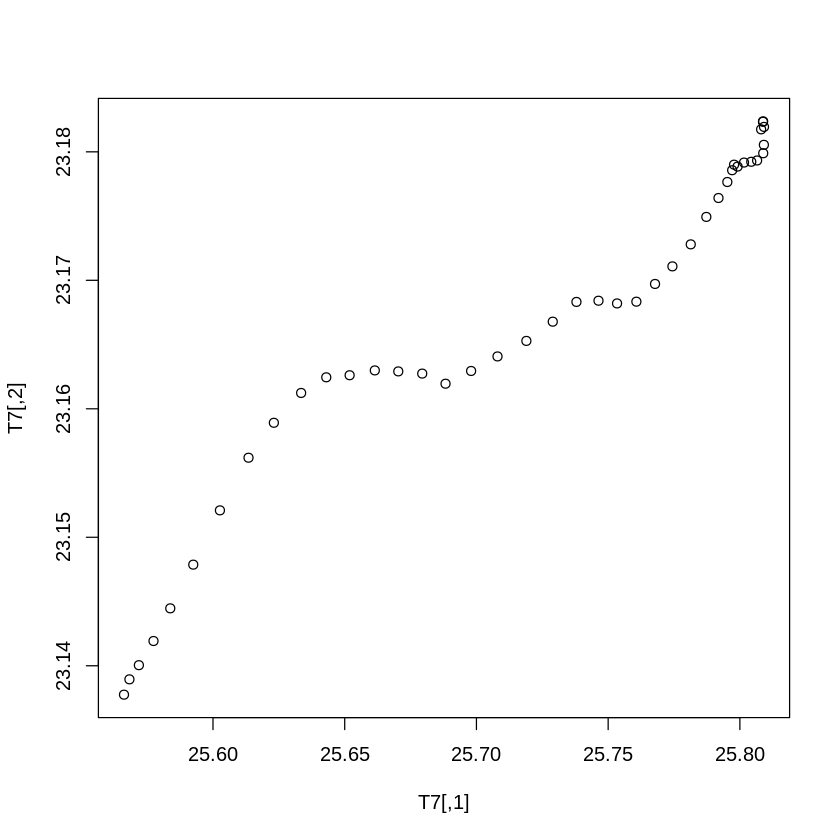

[1] "a"
 [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
 [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
[17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
[25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
[1] "subject1"
  [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
  [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
 [17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
 [25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
 [33] 25.80807 25.80882 25.80877 25.80916 25.80911 25.80886 25.80654 25.80432
 [41] 25.80157 25.79912 25.79780 25.79707 25.79524 25.79188 25.78727 25.78135
 [49] 25.77439 25.76779 25.76071 25.75338 25.74633 25.73796 25.72897 25.71895
 [57] 25.70800 25.69798 25.68827 25.67942 25.67033 25.66143 25.65187 25.64300
 [65] 25.63346 25.62311 25.61348 25.60263 25.

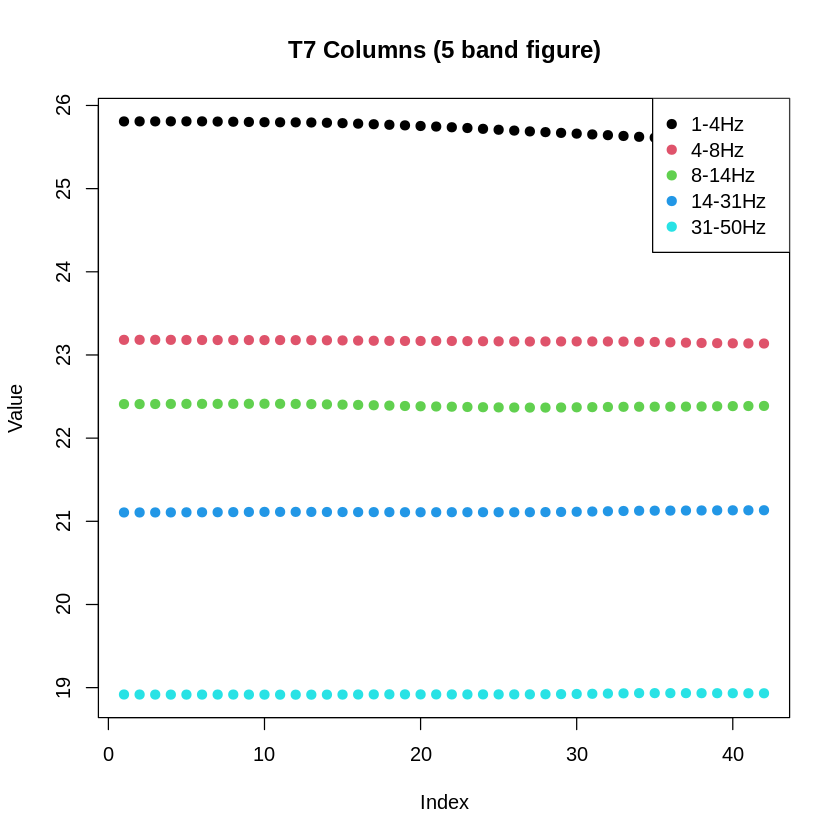

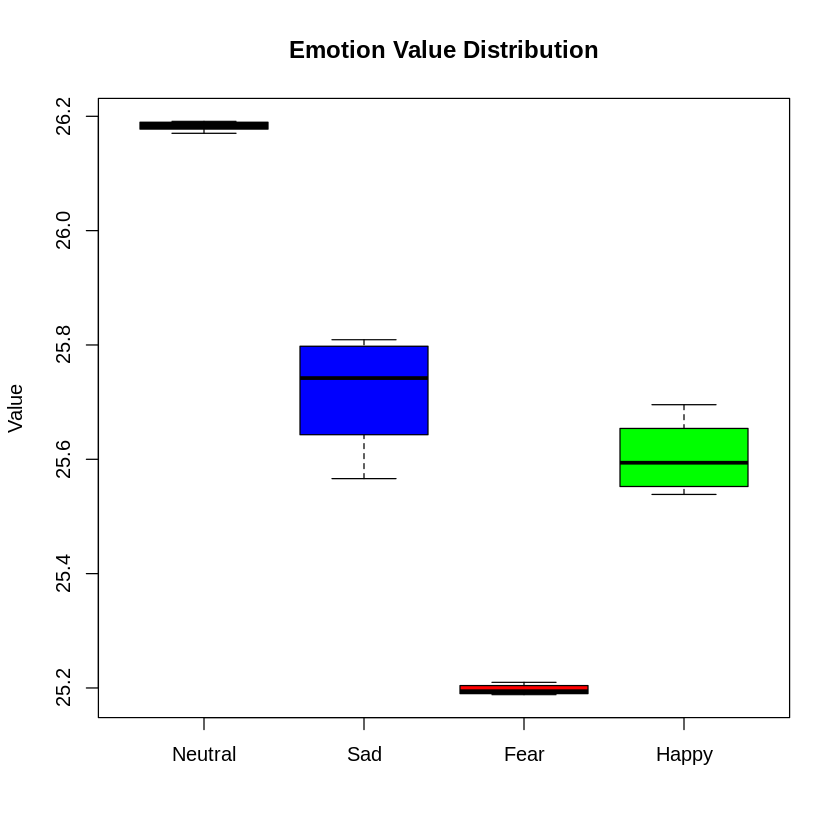

In [2]:
## I want to read and show EGG & eye data. To see how it is?


# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
sample <- readMat("1_20160518.mat")

de_LDS1 <- sample$de.LDS1
T7 <- de_LDS1[24, , ]
print(T7)
plot(T7)

matplot(T7, pch = 19, col = 1:5,
        main = "T7 Columns (5 band figure)",
        xlab = "Index", ylab = "Value")
legend("topright", legend = c("1-4Hz", "4-8Hz", "8-14Hz", "14-31Hz","31-50Hz"),
       col = 1:5, pch = 19)

a = sample$de.LDS4[24, , 1]
# a = as.vector(a)
print("a")
print(a)

# session1_label = [1,2,3,0 ...], let us see differenct emotions in T7 delta band.
subject1 = c(sample$de.LDS4[24, , 1], sample$de.LDS1[24, , 1], sample$de.LDS2[24, , 1], sample$de.LDS3[24, , 1])
print("subject1")
print(subject1)
neutral = sample$de.LDS4[24, , 1]
sad = sample$de.LDS1[24, , 1]
fear = sample$de.LDS2[24, , 1]
happy = sample$de.LDS3[24, , 1]

# Well, the emotions are distinguishable.
boxplot(neutral, sad, fear, happy,
        names = c("Neutral", "Sad", "Fear", "Happy"),
        main = "Emotion Value Distribution",
        ylab = "Value",
        col = c("black", "blue", "red", "green"))

# Now ,



## All Data Combine and View


# SVM Model

## Introduction of SVM


In [19]:
## Small size SVM test

## Declaration
FT7_order <- 15L
FT8_order <- 23L
T7_order <- 24L
T8_order <- 32L
TP7_order <- 33L
TP8_order <- 41L

delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5

times_order <-2

# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
sample <- readMat("1_20160518.mat")

de_LDS1 <- sample$de.LDS1
# Arrange the data
neutral = sample$de.LDS4[24, , 1]
sad = sample$de.LDS1[24, , 1]
fear = sample$de.LDS2[24, , 1]
happy = sample$de.LDS3[24, , 1]

# "Neutral", "Sad", "Fear", "Happy"
FT7 <- sample$de.LDS4[FT7_order, , ]
FT8 <- sample$de.LDS4[FT8_order, , ]
T7 <- sample$de.LDS4[T7_order, , ]
T8 <- sample$de.LDS4[T8_order, , ]
TP7 <- sample$de.LDS4[TP7_order, , ]
TP8 <- sample$de.LDS4[TP8_order, , ]
emotion <- rep("Neutral", dim(sample$de.LDS4)[times_order])

FT7 <- rbind(FT7, sample$de.LDS1[FT7_order, , ])
FT8 <- rbind(FT8, sample$de.LDS1[FT8_order, , ])
T7 <- rbind(T7, sample$de.LDS1[T7_order, , ])
T8 <- rbind(T8, sample$de.LDS1[T8_order, , ])
TP7 <- rbind(TP7, sample$de.LDS1[TP7_order, , ])
TP8 <- rbind(TP8, sample$de.LDS1[TP8_order, , ])
newEmotion <- rep("Sad", dim(sample$de.LDS1)[times_order])
emotion <- c(emotion, newEmotion)

emotion <- factor(emotion)
colnames(FT7) <- c("FT7_delta", "FT7_theta", "FT7_alpha", "FT7_beta", "FT7_gamma")

egg_data <- data.frame(
  FT7, FT8, T7, T8, TP7, TP8, emotion
)

head(egg_data)

# Train SVM
svm_model <- svm(emotion ~ ., data = egg_data, kernel = "radial")
pred <- predict(svm_model, newdata = egg_data)

# Confusion matrix
table(Predicted = pred, Actual = egg_data$emotion)

# Simple accuracy
mean(pred == egg_data$emotion)


[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 4   
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• 1_20160518.mat



,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,X1,X2,X3,X4,X5,⋯,X2.3,X3.3,X4.3,X5.3,X1.4,X2.4,X3.4,X4.4,X5.4,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,26.22747,23.53655,22.40434,21.05027,19.08881,26.54908,23.73661,22.34250,21.12510,19.09370,⋯,23.10836,22.23103,20.93053,18.60912,25.21314,23.18945,22.26031,21.17230,18.77244,Neutral
2,26.22714,23.53658,22.40539,21.05024,19.08925,26.54859,23.73593,22.34222,21.12467,19.09356,⋯,23.10788,22.23174,20.93040,18.60943,25.21288,23.18899,22.26001,21.17192,18.77263,Neutral
3,26.22734,23.53688,22.40711,21.05026,19.09002,26.54956,23.73614,22.34196,21.12428,19.09408,⋯,23.10792,22.23302,20.93036,18.60985,25.21188,23.18954,22.25969,21.17110,18.77303,Neutral
4,26.22733,23.53714,22.40806,21.05057,19.09128,26.54967,23.73592,22.34133,21.12479,19.09470,⋯,23.10786,22.23365,20.93017,18.61032,25.21126,23.18992,22.25912,21.17061,18.77331,Neutral
5,26.22677,23.53631,22.40813,21.05108,19.09304,26.54956,23.73489,22.34054,21.12525,19.09591,⋯,23.10685,22.23364,20.92979,18.61111,25.21028,23.19035,22.25788,21.16994,18.77350,Neutral
6,26.22817,23.53548,22.40817,21.05206,19.09448,26.54888,23.73447,22.33982,21.12630,19.09688,⋯,23.10568,22.23360,20.92978,18.61186,25.20878,23.19057,22.25685,21.16974,18.77401,Neutral


         Actual
Predicted Neutral Sad
  Neutral      32   0
  Sad           0  42

[1] 1